### Formulating the Convex Optimization Problem 

The given problem is a convex / quasiconvex feasibility problem. We have to check the feasibility of the problem for every value of $k$ until we find the optimal value $k^{*}$. 

The problem can be formulated as follows : - 

minimize $0$ `(because there is no objective, we just determine feasibility)`

subject to 

$\hspace{10mm}$ $0 <= T < T_{max}$
          
$\hspace{10mm}$ $v_{i+1} = v_{i} + (h/m).F[i]$

$\hspace{10mm}$ $p_{i+1} = p_{i} + h.v_{i}$

$\hspace{10mm}$ $p_{1} = p_{init}, \hspace{3mm} p_{k} = p_{des}$

$\hspace{10mm}$ $v_{1} = v_{k} = (0, 0)$


     

### Imports 

In [ ]:
import cvxpy as cvpy
import numpy as npy 
import math

### Given Data 

In [ ]:
m = 0.1
theta_deg = 15
theta_rad = (theta_deg/180)*(npy.pi)
T_max = 2
p_init = [0, 0]
p_des = [10, 2]
h = 0.1     

### Solving quasiconvex optimization problem 

In [ ]:
matrix_rot = npy.matrix([[-npy.sin(theta_rad) ,  npy.sin(theta_rad)], [npy.cos(theta_rad), npy.cos(theta_rad)]])

L_limit = 20
U_limit = 60

while(U_limit - L_limit > 1):

  k = int(npy.floor((U_limit + L_limit)/2))

  T = cvpy.Variable((2, k-1))

  g = npy.zeros((2, k - 1))

  for j in range(k-1):
    g[1][j] = -9.8

  F = matrix_rot * T + m*(g)

  p = cvpy.Variable((k, 2))
  x = p.T
  v = cvpy.Variable((k, 2))

  constraints = [0 <= T, T <= T_max]
  constraints += [p[0] == p_init, p[k-1] == p_des]
  constraints += [v[0] == [0, 0], v[k-1] == [0,0]]
  
  for i in range((k-1)):
    constraints += [v[i+1] == v[i] + ((h/m)*F.T[i])]
    constraints += [p[i+1] == p[i] + h*v[i]]

  objective = cvpy.Minimize(0)
  problem = cvpy.Problem(objective, constraints)
  problem.solve(solver = 'ECOS')

  if(problem.status == 'optimal'):
    U_limit = k
    temp_ans = k
  else:
    L_limit = k

print("The minimum time K* : ", round((temp_ans) * h, 2), " seconds")

The minimum time K* :  3.4  seconds


### Graphs 

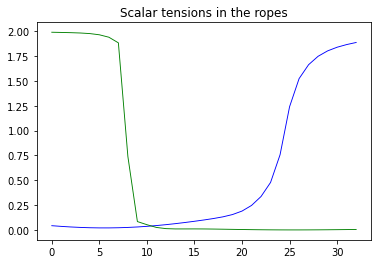

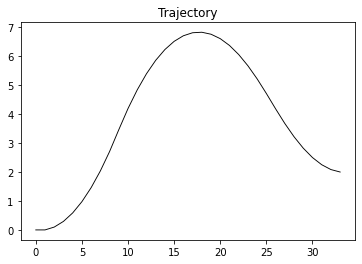

In [ ]:
from matplotlib import pyplot as plt 

plt.plot(T[0].value, color = 'blue', alpha = 2, linewidth = '0.9', mfc='white')
plt.plot(T[1].value, color = 'green', alpha = 2, linewidth = '0.9', mfc = 'white')
plt.title("Scalar tensions in the ropes")
plt.show()

plt.plot(x[1].value, color = 'black', alpha = 2, linewidth = '0.9', mfc='white')
plt.title("Trajectory")
plt.show()

### Answer to Part - (b) 

The load does not move in an horizontal line, because the trajectory graph is not a straight line. 

This is because the left and right tensions are unequal (due to a factor of $-sin(\theta)$). 

Therefore, it does not move in a line segment from $p^{init}$ to $p^{des}$. 